In [1]:
%%time
%pip install numpy matplotlib
%pip install torch==1.13.1+cpu torchvision==0.14.1+cpu torchaudio==0.13.1+cpu \
--index-url https://download.pytorch.org/whl/cpu

Looking in indexes: https://download.pytorch.org/whl/cpu
ERROR: Could not find a version that satisfies the requirement torch==1.13.1+cpu (from versions: 2.2.0+cpu, 2.2.1+cpu, 2.2.2+cpu, 2.3.0+cpu, 2.3.1+cpu, 2.4.0+cpu, 2.4.1+cpu, 2.5.0+cpu, 2.5.1+cpu, 2.6.0+cpu, 2.7.0+cpu, 2.7.1+cpu, 2.8.0+cpu, 2.9.0+cpu, 2.9.1+cpu, 2.10.0+cpu)
ERROR: No matching distribution found for torch==1.13.1+cpu
CPU times: user 2.93 s, sys: 412 ms, total: 3.35 s
Wall time: 11.7 s


In [2]:
from torch import nn, optim
import torch
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from torch.utils.data import Dataset, DataLoader



In [3]:
torch.manual_seed(1)

In [28]:
def Plot_2D_Plane(model, dataset, n=0):
    w1 = model.state_dict()['linear.weight'].numpy()[0][0]
    w2 = model.state_dict()['linear.weight'].numpy()[0][1]
    b = model.state_dict()['linear.bias'].numpy()

    # Data
    x1 = dataset.x[:, 0].view(-1, 1).numpy()
    x2 = dataset.x[:, 1].view(-1, 1).numpy()
    y = dataset.y.numpy()

    # Make plane
    X, Y = np.meshgrid(np.arange(x1.min(), x1.max(), 0.05), np.arange(x2.min(), x2.max(), 0.05))
    yhat = w1 * X + w2 * Y + b

    # Plotting
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    ax.plot(x1[:, 0], x2[:, 0], y[:, 0],'ro', label='y') # Scatter plot

    ax.plot_surface(X, Y, yhat) # Plane plot

    ax.set_xlabel('x1 ')
    ax.set_ylabel('x2 ')
    ax.set_zlabel('y')
    plt.title('estimated plane iteration:' + str(n))
    ax.legend()

    plt.show()

In [29]:
class Data2D(Dataset):

    # Constructor
    def __init__(self):
        self.x = torch.zeros(20, 2)
        self.x[:, 0] = torch.arange(-1, 1, 0.1)
        self.x[:, 1] = torch.arange(-1, 1, 0.1)
        self.w = torch.tensor([[1.0], [1.0]])
        self.b = 1
        self.f = torch.mm(self.x, self.w) + self.b
        self.y = self.f + 0.1 * torch.randn((self.x.shape[0],1))
        self.len = self.x.shape[0]

    # Getter
    def __getitem__(self, index):
        return self.x[index], self.y[index]

    # Get Length
    def __len__(self):
        return self.len

In [30]:
data_set = Data2D()

In [31]:
class linear_regression(nn.Module):

  def __init__(self, input_size, output_size):
    super(linear_regression, self).__init__()
    self.linear = nn.Linear(input_size, output_size)

  def forward(self, x):
    yhat = self.linear(x)
    return yhat

In [32]:
model = linear_regression(2,1)
print("The parameters: ", list(model.parameters()))

The parameters:  [Parameter containing:
tensor([[0.0884, 0.5277]], requires_grad=True), Parameter containing:
tensor([0.5123], requires_grad=True)]


In [33]:
optimizer = optim.SGD(model.parameters(), lr = 0.1)

In [34]:
criterion = nn.MSELoss

In [35]:
train_loader = DataLoader(dataset = data_set, batch_size = 2)

Before training: 


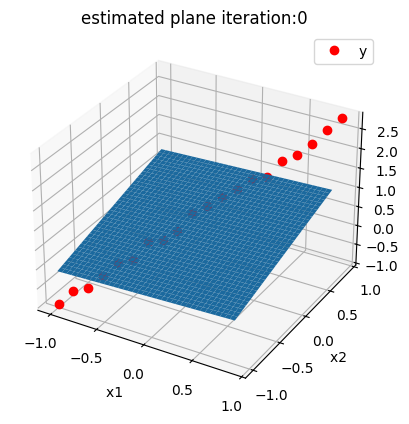

After training


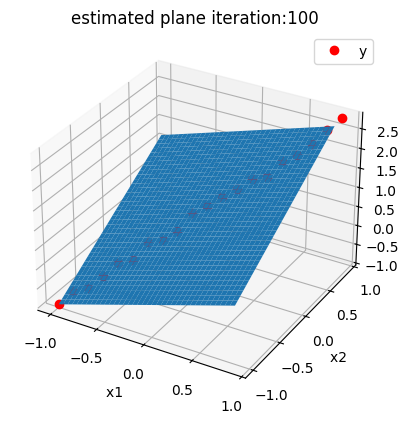

In [36]:
LOSS = []
print("Before training: ")
Plot_2D_Plane(model, data_set)
epochs = 100

criterion = nn.MSELoss() # Fix: Instantiate MSELoss

def train_model(epochs):
  for epoch in range(epochs):
    for x,y in train_loader:
      yhat = model(x)
      loss = criterion(yhat, y)
      LOSS.append(loss.item())
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

train_model(epochs)
print("After training")
Plot_2D_Plane(model, data_set, epochs)

Text(0, 0.5, 'Cost/total loss ')

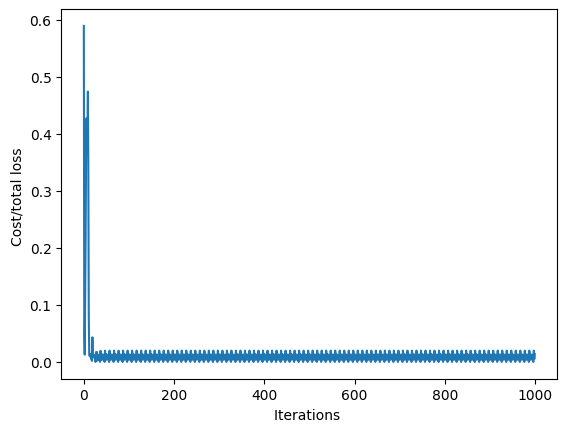

In [37]:
plt.plot(LOSS)
plt.xlabel("Iterations ")
plt.ylabel("Cost/total loss ")

In [ ]:
model1 = linear_regression(2,1)
optimizer = optim.SGD(model.parameters(), lr = 0.1)
criterion = nn.MSELoss
train_loader = DataLoader(dataset=data_set, batch_size=10)
data_set = Data2D()

LOSS1 = []
print("Before training: ")
Plot_2D_Plane(model, data_set)
epochs = 100

criterion = nn.MSELoss() # Fix: Instantiate MSELoss

def train_model1(epochs):
  for epoch in range(epochs):
    for x,y in train_loader:
      yhat = model1(x)
      loss = criterion(yhat, y)
      LOSS1.append(loss.item())
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

train_model1(epochs)
Plot_2D_Plane(model1 , data_set)
plt.plot(LOSS1)
plt.xlabel("iterations ")
plt.ylabel("Cost/total loss ")

Before training: 
